**This Jupyter Notebook requires a Python Kernel of the abz-env Conda Env**

In [5]:
from highway_reproduction import *
from custom_highway import *

# Acceleration control bug: Must be >0 to avoid car accidentally going backwards...
BrakingVehicle.MIN_SPEED = 1.0

from highway_env.vehicle.kinematics import Vehicle
from highway_env.vehicle.behavior import IDMVehicle
Vehicle.MIN_SPEED = 0.0
IDMVehicle.ACC_MAX = 5.0
IDMVehicle.MIN_SPEED = 0.0

In [6]:
#BrakingVehicle.MIN_SPEED = 0.01 # Acceleration bug

In [7]:
def takewhile_inclusive(predicate, it):
    """Source: https://stackoverflow.com/a/70762559"""
    for x in it:
        if predicate(x):
            yield x
        else:
            yield x
            break

In [8]:
env_front_brakes = gym.make("highway-env-fast-seedable-v0", render_mode=None)
env_front_brakes.configure({
    "observation_seed": [1.0, 0.0011208171058602599, 0.0, 0.3359375, 0.0, 1.0, 0.0302734375, 0.0, 0.15625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    #"observation_seed": [1.0, 0.001953125, 0.0, 0.28125, 0.0, 1.0, 0.0263671875, 0.0, 0.203125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    #"other_vehicles_type": "custom_highway.BrakingVehicle",
        "action": {
            "type": "custom_highway.AsymmetricDiscreteAction",
            "acceleration_range": [-5.0, 5.0],
            "longitudinal": True,
            "lateral": False,
            "speed_range": [0, 40],
            "dynamical": False,
            "clip": True}
})
# env_front_brakes = gym.make("highway-env-fast-seedable-v0", render_mode=None)
# env_front_brakes.configure({
#     "observation_seed": [1.0, 0.0011208171058602599, 0.0, 0.3359375, 0.0, 1.0, 0.0302734375, 0.0, 0.15625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
# })
#env_front_brakes = reproduce_crash_get_envs([1.0, 0.0011208171058602599, 0.0, 0.3359375, 0.0, 1.0, 0.0302734375, 0.0, 0.15625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])[0][1]

/home/samuel/anaconda3/envs/abz/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(


In [9]:
res_nn,res_braking, nn_traj, default_traj = reproduce_crash_evaluate_with_trajectory([env_front_brakes], "../nets/highspeed-rew-1.zip", test_runs=1, default_action=0,seed=42)

/home/samuel/anaconda3/envs/abz/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:437: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  th_object = th.load(fil

Testing model
Testing default action


In [10]:
print(res_nn)
print(res_braking)
print("Seconds NN: ", len(nn_traj))
print("Seconds Braking: ", len(default_traj))

([1], [3.118063])
([0], [15.7421875])
Seconds NN:  5
Seconds Braking:  31


In [11]:
nn_traj

[array([[1.        , 0.00112082, 0.        , 0.3359375 , 0.        ],
        [1.        , 0.03027344, 0.        , 0.15625   , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]],
       dtype=float32),
 array([[1.        , 0.14549582, 0.        , 0.3984375 , 0.        ],
        [1.        , 0.07312563, 0.        , 0.03913836, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]],
       dtype=float32),
 array([[ 1.        ,  0.3148708 ,  0.        ,  0.4609375 ,  0.        ],
        [ 1.        ,  0.07388426,  0.        , -0.05026584,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.  

# Plot

In [12]:
import matplotlib
font = {'size'   : 28}

matplotlib.rc('font', **font)

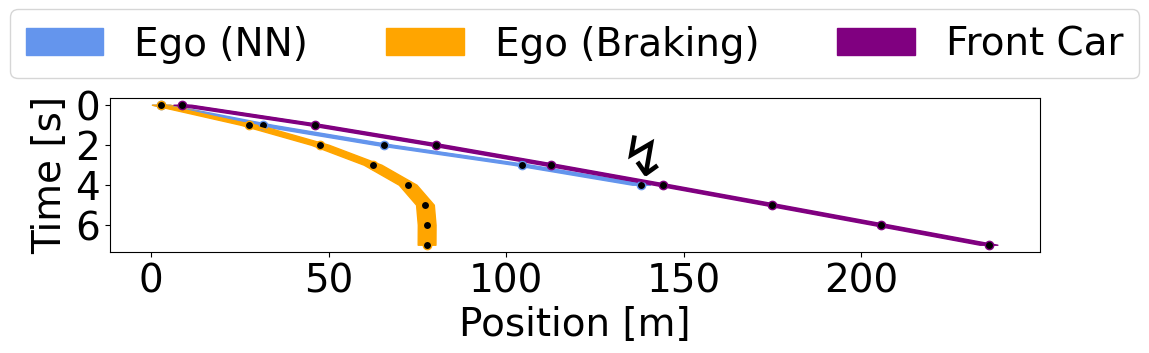

In [16]:
import matplotlib.pyplot as plt
import numpy as np

ego_positions_nn = map(lambda x: x[0][1], nn_traj)
other_positions_nn = map(lambda x: x[0][1]+x[1][1], nn_traj)
both_positions_nn = list(takewhile_inclusive(lambda x: x[0] <= x[1], zip(ego_positions_nn, other_positions_nn)))
ego_positions_nn = list(map(lambda x: x[0], both_positions_nn))
other_positions_nn = list(map(lambda x: x[1], both_positions_nn))
ego_positions_nn = np.array(ego_positions_nn)*5*40
other_positions_nn = np.array(other_positions_nn)*5*40

t = np.arange(0, 30, 1)
num_steps = 5 #len(list(filter(lambda x: x[1][0]==1.0, nn_traj)))
t_nn = -t[:num_steps]
ego_positions_nn = ego_positions_nn[:num_steps]
other_positions_nn = other_positions_nn[:num_steps]
#plt.plot(ego_positions_nn, t_nn, label="Ego")
plt.fill_betweenx(t_nn, ego_positions_nn, ego_positions_nn+5, alpha=1.0, color="cornflowerblue", label="Ego (NN)")
plt.plot(ego_positions_nn+2.5, t_nn, markerfacecolor="black", marker="o",markersize=6, color="cornflowerblue")
#plt.fill_betweenx(t_nn, other_positions_nn, other_positions_nn+5, alpha=1.0, color="cornflowerblue", label="Ego")
#plt.plot(other_positions_nn+2.5, t_nn, markerfacecolor="black", marker=">",markersize=10, color="cornflowerblue")
#plt.plot(other_positions_nn, t_nn, label="Other")

ego_positions_def = map(lambda x: x[0][1], default_traj)
other_positions_def = map(lambda x: x[0][1]+x[1][1], default_traj)
both_positions_def = list(takewhile_inclusive(lambda x: x[0] <= x[1], zip(ego_positions_def, other_positions_def)))
ego_positions_def = list(map(lambda x: x[0], both_positions_def))
other_positions_def = list(map(lambda x: x[1], both_positions_def))
ego_positions_def = np.array(ego_positions_def)*5*40
other_positions_def = np.array(other_positions_def)*5*40

t = np.arange(0, 30, 1)
num_steps = 8#len(list(filter(lambda x: x[1][0]==1.0, default_traj)))
t_def = -t[:num_steps]
ego_positions_def = ego_positions_def[:num_steps]
other_positions_def = other_positions_def[:num_steps]
#plt.plot(ego_positions_nn, t_nn, label="Ego")
plt.fill_betweenx(t_def, ego_positions_def, ego_positions_def+5, alpha=1.0, color="orange", label="Ego (Braking)")
plt.plot(ego_positions_def+2.5, t_def, markerfacecolor="black", marker="o",markersize=6, color="orange")
plt.fill_betweenx(t_def, other_positions_def, other_positions_def+5, alpha=1.0, color="purple", label="Front Car")
plt.plot(other_positions_def+2.5, t_def, markerfacecolor="black", marker="o",markersize=6, color="purple")

plt.xlabel("Position [m]")
plt.ylabel("Time [s]")
plt.xticks(np.arange(0, 201, 50))
plt.yticks(np.arange(0, -(num_steps), -2), np.arange(0, (num_steps), 2))
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.7),ncol=3)
#plt.gca().set_aspect(10)
#plt.tight_layout()
plt.rcParams["figure.figsize"] = (12,2)
plt.text(132, -3.6, "↯",fontdict={'size': 40})
plt.savefig("crash.pdf", bbox_inches='tight')
plt.show()